<BR/>
<BR/>
<BR/>

# 2. LOGISTIC REGRESSION AND LDA

You are hired by the Government to do an analysis of car crashes. You are provided details of car
crashes, among which some people survived and some didn't. You have to help the government in
predicting whether a person will survive or not on the basis of the information given in the data set
so as to provide insights that will help the government to make stronger laws for car manufacturers
to ensure safety measures. Also, find out the important factors on the basis of which you made your
predictions.

### 2.1. INITIAL ANALYSIS

In [3]:
import pandas as pd

# Read the dataset
df_car_crash = pd.read_csv('Car_Crash (9).csv')

# Display basic information about the dataset
df_car_crash.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  object 
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  float64
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11140 non-null  float64
 15  caseid       11217 non-null  object 
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


In [ ]:
df_car_crash.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df_car_crash.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,4,27.078,0,1,1,1,1,32,1997,1987.0,2,0,0,4.0,2:13:2
1,2,89.627,0,0,0,0,0,54,1997,1994.0,1,0,0,4.0,2:17:1
2,4,27.078,0,1,0,1,1,67,1997,1992.0,2,0,0,4.0,2:79:1
3,4,27.078,0,1,0,1,0,64,1997,1992.0,2,1,0,4.0,2:79:1
4,4,13.374,0,1,1,1,1,23,1997,1986.0,2,0,0,4.0,4:58:1


In [ ]:
# Descriptive statistics
df_car_crash.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11140.000000
mean,431.405309,0.644022,37.427654,2001.103236,1994.177944,0.389141,1.825583
std,1406.202941,0.478830,18.192429,1.056805,5.658704,0.487577,1.378535
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,28.292000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,82.195000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,324.056000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,31694.040000,1.000000,97.000000,2002.000000,2003.000000,1.000000,5.000000


In [ ]:

# Check for null values
df_car_crash.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [ ]:
# Fill missing values in 'injSeverity' column with the mode
mode_injSeverity = df_car_crash['injSeverity'].mode()[0]
df_car_crash['injSeverity'].fillna(mode_injSeverity, inplace=True)

### 2.2. UNIVARIATE ANALYSIS

**Let's check the distribution of estimated impact speeds. We can see that most impact speeds were in the range of 10-24**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

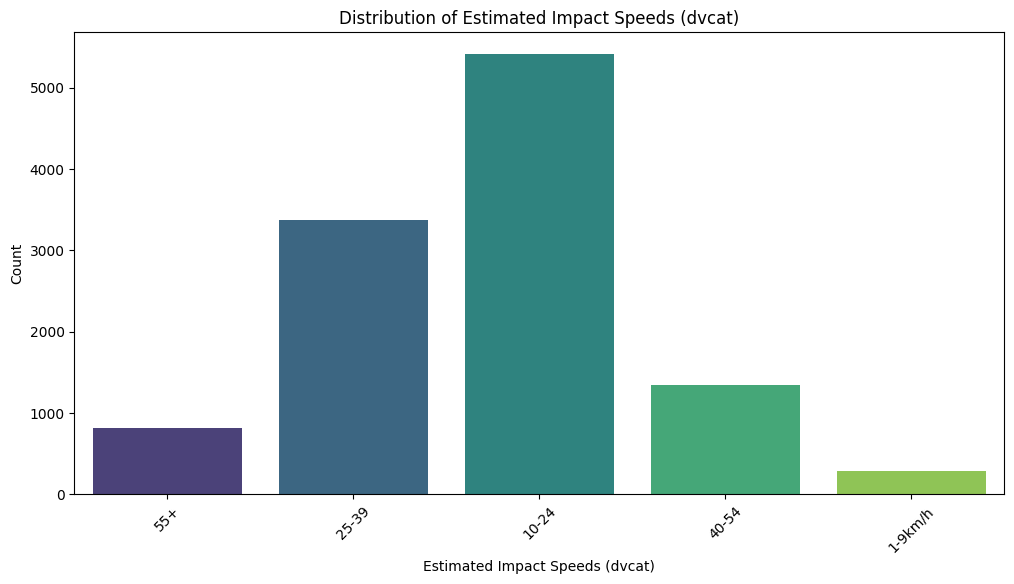

In [ ]:
# Distribution of 'dvcat' (Estimated Impact Speeds)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_car_crash, x='dvcat', palette='viridis')
plt.title('Distribution of Estimated Impact Speeds (dvcat)')
plt.xlabel('Estimated Impact Speeds (dvcat)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**By checking the distribution of gender, we can see that there is a higher proportion of males as compared to females.**

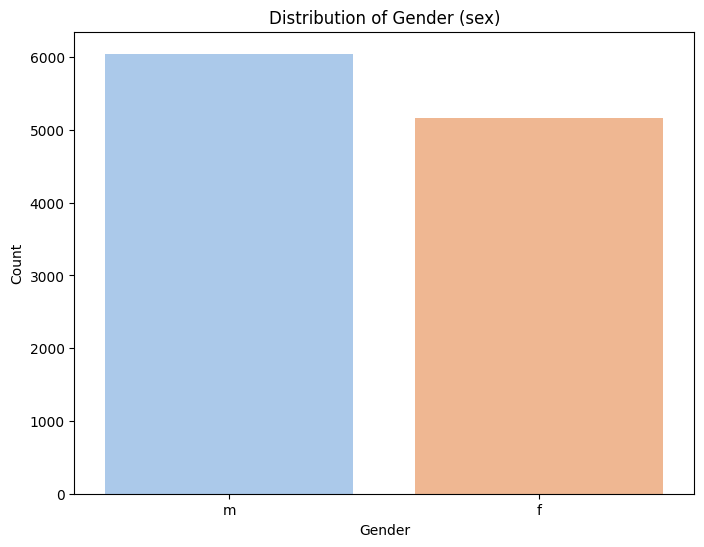

In [ ]:
# Distribution of 'sex' (Gender)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_car_crash, x='sex', palette='pastel')
plt.title('Distribution of Gender (sex)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**By checking the distribution of aribag deployment category, we can see that there are three classes, "unavail", "nodeploy", and "deploy", with "deploy" being the highest.**

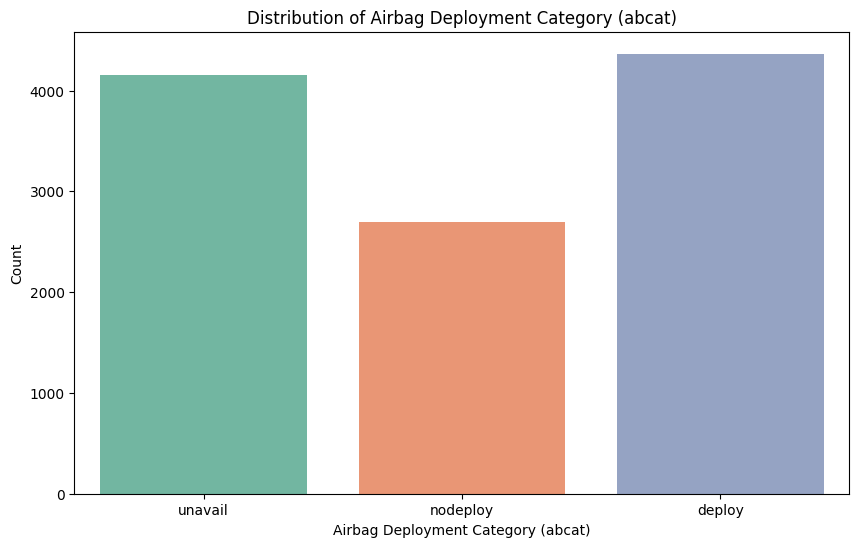

In [ ]:
# Distribution of 'abcat' (Airbag Deployment Category)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_car_crash, x='abcat', palette='Set2')
plt.title('Distribution of Airbag Deployment Category (abcat)')
plt.xlabel('Airbag Deployment Category (abcat)')
plt.ylabel('Count')
plt.show()

**By checking the countplot of occupant role, we see that the drivers were nearly 3 times more than passengers.**

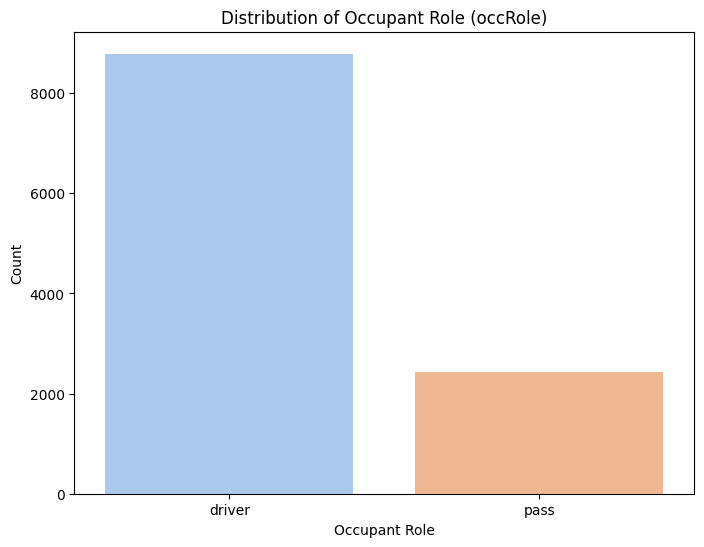

In [ ]:

# Distribution of 'occRole' (Occupant Role)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_car_crash, x='occRole', palette='pastel')
plt.title('Distribution of Occupant Role (occRole)')
plt.xlabel('Occupant Role')
plt.ylabel('Count')
plt.show()

### 2.3. BIVARIATE ANALYSIS

**The box plot shows a comparative analysis of the survived feature against the occupant age. We can observe that the distribution of "Not survived" is much greater than those of "Survived". At the same time, "Not survived" doesn't have any outliers, while "survived" has some outliers.**

**The fact that the distribution of 'Not Survived' is greater than that of 'Survived' suggests that the majority of occupants did not survive the car crashes in this dataset.**

**Moreover, the presence of outliers in the "Survived" category's box indicates that there are some instances where occupants who survived the crashes were either significantly older compared to the majority of survivors.**

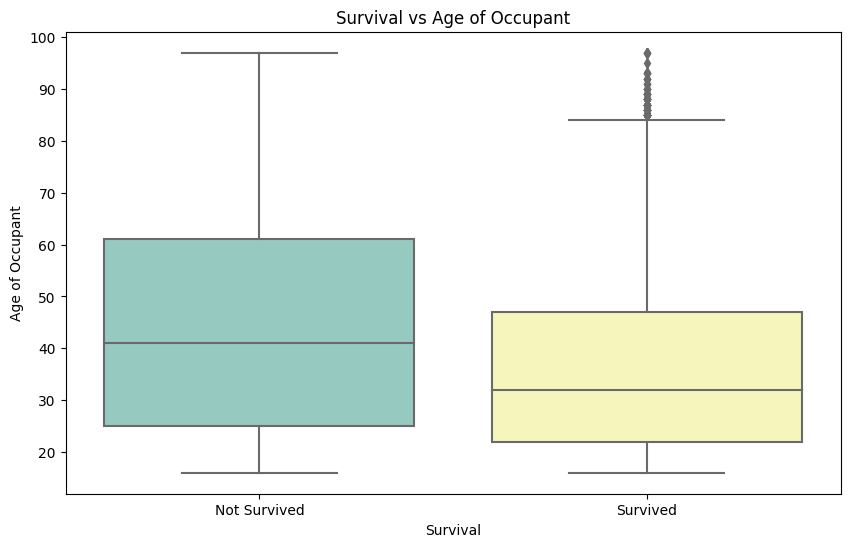

In [ ]:
# Box plot: Survival vs Age of Occupant
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_car_crash, x='Survived', y='ageOFocc', palette='Set3')
plt.title('Survival vs Age of Occupant')
plt.xlabel('Survival')
plt.ylabel('Age of Occupant')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


**The box plot below shows a comaprison between the age of occupant and their gender. We can see that there were a higher number of outliers in the female category as comapred to male gender. We can also see that the IQR of male gender is between 20 and 50, while the IQR of female is more spread out, approximately between 20 and 55.**

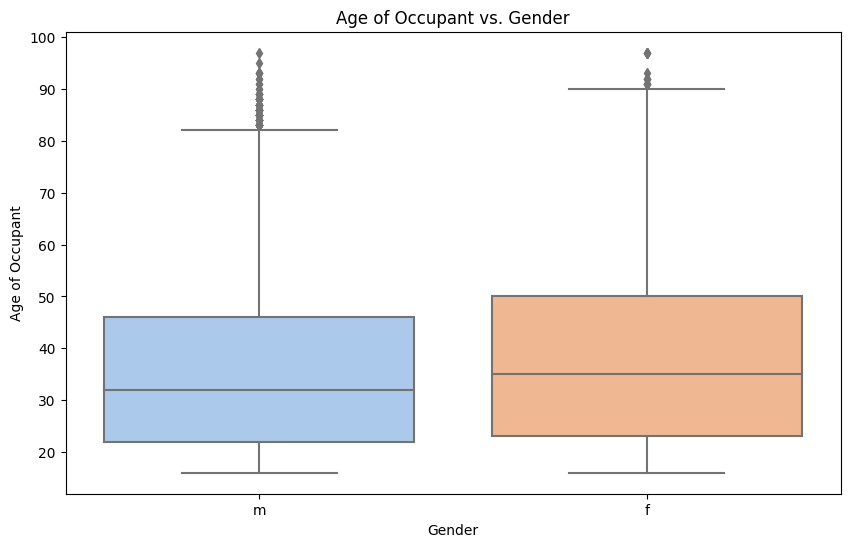

In [ ]:
# Box plot: Age of Occupant vs. Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_car_crash, x='sex', y='ageOFocc', palette='pastel')
plt.title('Age of Occupant vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Age of Occupant')
plt.show()


**Looking below at the boxplot, we see a comparison between the age of occupant and the airbag deployment category. It is evident that all three categories of deployment have a similar inter-quartile range, but the number of outliers in each category vary with "deploy" category having the highest number of outliers, followed by the "unavail" category, and lastly, with the least number of outliers, we have the "nodeploy" category.**

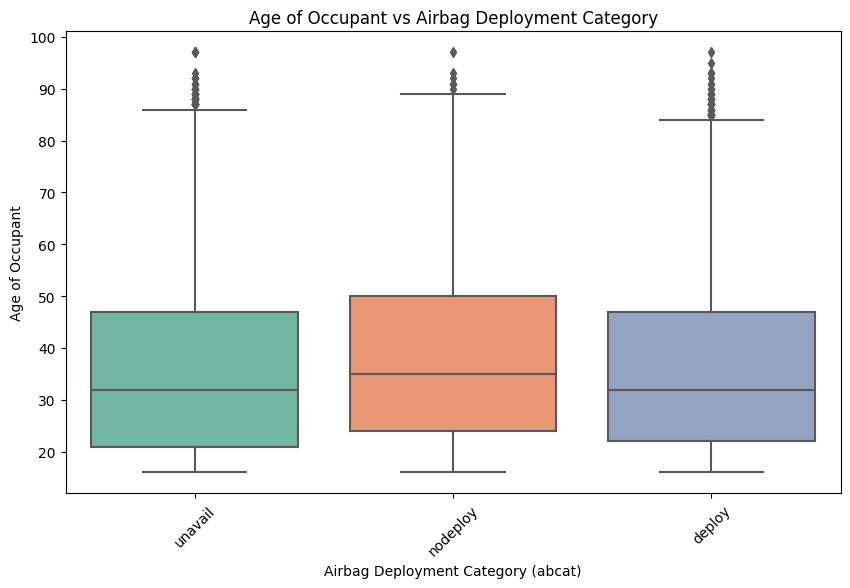

In [ ]:
# Box plot: Age of Occupant vs Airbag Deployment Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_car_crash, x='abcat', y='ageOFocc', palette='Set2')
plt.title('Age of Occupant vs Airbag Deployment Category')
plt.xlabel('Airbag Deployment Category (abcat)')
plt.ylabel('Age of Occupant')
plt.xticks(rotation=45)
plt.show()

**Lastly, let's visualize a correlation heatmap between each features, with positively high correlation indicated by dark red, and lower levels indicated by light blue.**

In [105]:
df_car_crash

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,4,27.078,0,1,1,1,1,32,1997,1987.0,2,0,0,4.0,2:13:2
1,2,89.627,0,0,0,0,0,54,1997,1994.0,1,0,0,4.0,2:17:1
2,4,27.078,0,1,0,1,1,67,1997,1992.0,2,0,0,4.0,2:79:1
3,4,27.078,0,1,0,1,0,64,1997,1992.0,2,1,0,4.0,2:79:1
4,4,13.374,0,1,1,1,1,23,1997,1986.0,2,0,0,4.0,4:58:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,2,3179.688,1,1,0,1,1,17,2002,1985.0,2,0,0,0.0,82:107:1
11213,1,71.228,1,0,0,1,1,54,2002,2002.0,1,0,0,2.0,82:108:2
11214,1,10.474,1,0,0,1,0,27,2002,1990.0,0,0,1,3.0,82:110:1
11215,2,10.474,1,0,0,1,0,18,2002,1999.0,0,0,1,0.0,82:110:2


<ipython-input-108-62690725d9a9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_car_crash.corr()


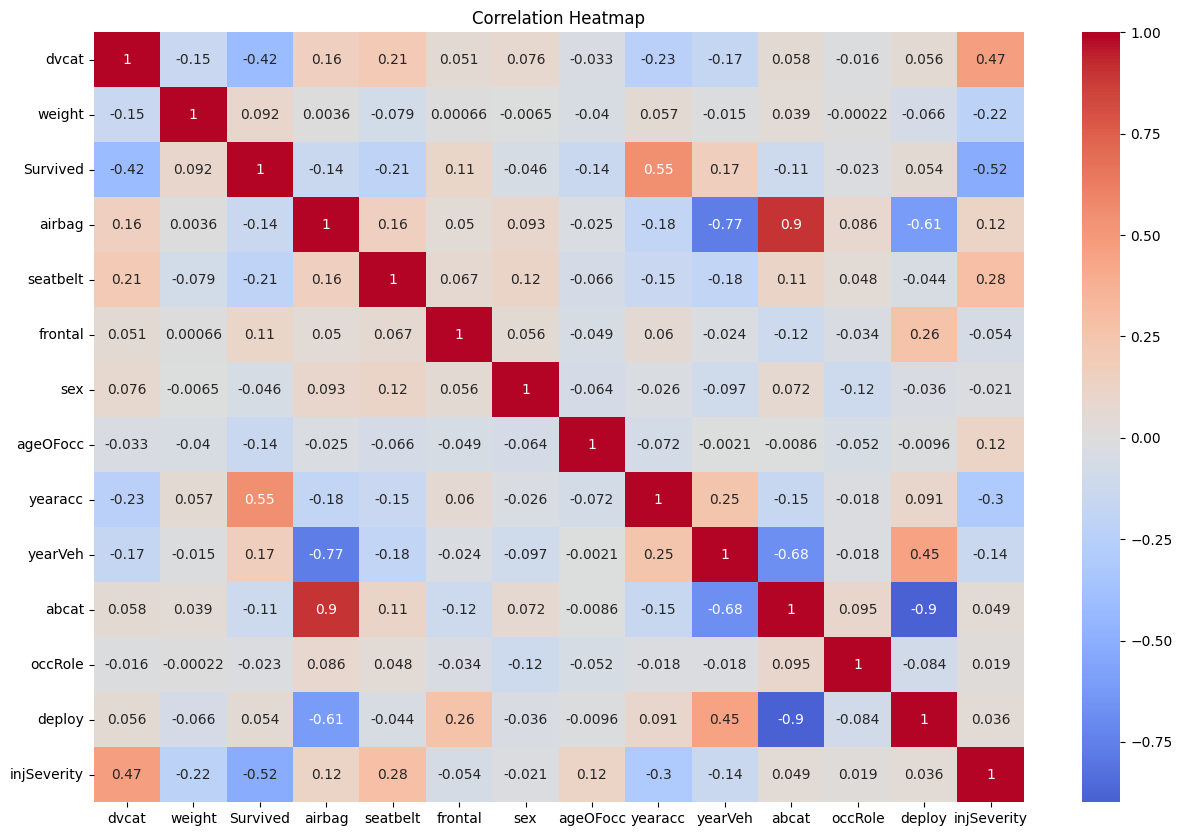

In [108]:

# Correlation heatmap
plt.figure(figsize=(15, 10))
corr_matrix = df_car_crash.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


### 2.4. ENCODING CATEGORICAL VARIABLES AND SPLITTING DATASET

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['airbag', 'seatbelt', 'sex', 'abcat', 'dvcat', 'Survived', 'occRole']
for col in categorical_columns:
    df_car_crash[col] = label_encoder.fit_transform(df_car_crash[col])

# Define features and target variable
X = df_car_crash.drop(['Survived', "caseid"], axis=1)
y = df_car_crash['Survived']

# Split data into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 2.5. CREATING LOGISTIC REGRESSION AND LDA MODEL AND FITTING TRAINING DATA ON THEM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize models
logreg_model = LogisticRegression(max_iter=1000)
lda_model = LinearDiscriminantAnalysis()

# Fit models on training data
logreg_model.fit(X_train, y_train)
lda_model.fit(X_train, y_train)



LinearDiscriminantAnalysis()

### 2.6. MAKING PREDICTIONS ON BOTH MODELS

In [ ]:

# Predict on training and testing data
logreg_train_preds = logreg_model.predict(X_train)
logreg_test_preds = logreg_model.predict(X_test)


lda_train_preds = lda_model.predict(X_train)
lda_test_preds = lda_model.predict(X_test)


In [ ]:
print("Training predictions by LDA: \n")
print(lda_train_preds)

print("Testing predictions by LDA: \n")
print(lda_test_preds)

print("Training predictions by logistic regression: \n")
print(logreg_train_preds)

print("Testing predictions by logistic regression: \n")
print(logreg_test_preds)


Training predictions by LDA: 

[1 1 1 ... 1 1 1]
Testing predictions by LDA: 

[1 1 1 ... 1 1 1]
Training predictions by logistic regression: 

[1 1 1 ... 1 1 1]
Testing predictions by logistic regression: 

[1 1 1 ... 1 1 1]


### 2.7. PLOTTING ROC CURVE ALONGWITH THE ROC_AUC SCORE FOR BOTH MODELS

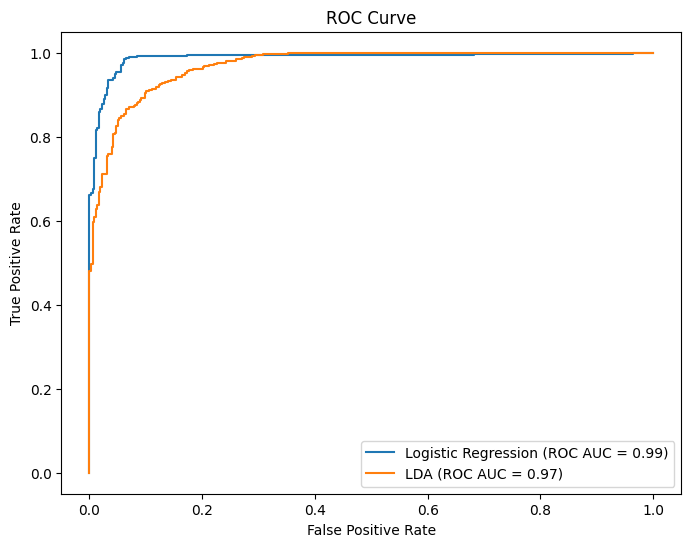

In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, confusion, roc_auc

# Evaluate Logistic Regression
logreg_train_acc, logreg_train_conf, logreg_train_roc_auc = evaluate_model(y_train, logreg_train_preds)
logreg_test_acc, logreg_test_conf, logreg_test_roc_auc = evaluate_model(y_test, logreg_test_preds)

# Evaluate LDA
lda_train_acc, lda_train_conf, lda_train_roc_auc = evaluate_model(y_train, lda_train_preds)
lda_test_acc, lda_test_conf, lda_test_roc_auc = evaluate_model(y_test, lda_test_preds)

# Plot ROC curves
def plot_roc(y_true, y_pred_probs, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    roc_auc = roc_auc_score(y_true, y_pred_probs)  # Calculate ROC AUC score
    plt.plot(fpr, tpr, label=f'{model_name} (ROC AUC = {roc_auc:.2f})')  # Include the calculated ROC AUC
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

logreg_test_pred_probs = logreg_model.predict_proba(X_test)[:, 1]
lda_test_pred_probs = lda_model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))
plot_roc(y_test, logreg_test_pred_probs, 'Logistic Regression')
plot_roc(y_test, lda_test_pred_probs, 'LDA')
plt.show()

***ABOVE CODE EXPLANATION***

First, the `evaluate_model` function calculates accuracy, confusion matrix, and ROC AUC score for a given set of true and predicted labels. These metrics offer insights into the models' classification performance.

Both Logistic Regression and LDA models are evaluated using this function on both training and testing data. The evaluation results, including accuracy, confusion matrix, and ROC AUC score, are stored.

The plot_roc function is employed to create ROC curves. These curves visualize the models' performance in distinguishing between classes by depicting the true positive rate against the false positive rate. The ROC AUC score is added to the legend of each curve.

Predicted probabilities from both models are obtained using the predict_proba method. These probabilities are then used to plot the ROC curves for Logistic Regression and LDA models in a single figure.

### 2.8. COMPARING FURTHER BETWEEN MODELS

In [ ]:
# Compare model performance
print("Model Comparison:")
print("========================================")
print("Logistic Regression:")
print(f"Train Accuracy: {logreg_train_acc:.4f}, Test Accuracy: {logreg_test_acc:.4f}")
print(f"ROC AUC: {logreg_test_roc_auc:.4f}")
print("\nConfusion Matrix:")
print(logreg_test_conf)
print("\nLinear Discriminant Analysis:")
print(f"Train Accuracy: {lda_train_acc:.4f}, Test Accuracy: {lda_test_acc:.4f}")
print(f"ROC AUC: {lda_test_roc_auc:.4f}")
print("\nConfusion Matrix:")
print(lda_test_conf)
print("========================================")

Model Comparison:
Logistic Regression:
Train Accuracy: 0.9809, Test Accuracy: 0.9801
ROC AUC: 0.9323

Confusion Matrix:
[[ 312   46]
 [  21 2987]]

Linear Discriminant Analysis:
Train Accuracy: 0.9600, Test Accuracy: 0.9605
ROC AUC: 0.8512

Confusion Matrix:
[[ 255  103]
 [  30 2978]]


Based on the provided model comparison metrics:

**Logistic Regression:**

1. Both on the training and testing data, the Logistic Regression model performs consistently well with high accuracy.
2. The ROC AUC score of 0.9323 indicates the model's ability to effectively distinguish between classes.
3. The confusion matrix reveals 312 true positive predictions, 2987 true negatives, 46 false positives, and 21 false negatives.

**Linear Discriminant Analysis (LDA):**

1. The Linear Discriminant Analysis model also demonstrates good accuracy on both the training and testing data.
2. The ROC AUC score of 0.8512 suggests a reasonable performance in separating classes.
3. The confusion matrix indicates 255 true positive predictions, 2978 true negatives, 103 false positives, and 30 false negatives.


In conclusion, both models show strong classification capabilities with high accuracy on the test set. Logistic Regression exhibits a slightly better ROC AUC score, suggesting a better overall discrimination ability. The confusion matrices further confirm the models' effectiveness in making accurate predictions.

### 2.9. CONCLUSION

1. Most of the estimated impact speeds were in the range of 10-24.
2. The distribution of gender was almost equal.
3. There were three main categories in the airbag deployment cateogry, namely "unavail", "nodeploy", and "deploy".
4. The occupant roles were drivers and passengers, with passenger being very less as compared to the drivers.
5. The presence of outliers in the "Survived" category's box indicates that there are some instances where occupants who survived the crashes were either significantly older compared to the majority of survivors.
6. The most important features for predicting the survival are; injSeverity, airbag category, year of accident, seatbelt, and dvcat (estimated impact speeds). Among these, "injSeverity", "Abcat", seatbelt", and "dvcat" have a negative correlation with the survival feature, while only the "year of accident" feature is postively correlated.